<a href="https://colab.research.google.com/github/latifahnl/FGA-DS2/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/My Drive/data

/content/drive/My Drive/data


In [ ]:
#! git clone link to your repo

## Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

## Import Data

In [ ]:
#!python --version

Python 3.9.16


In [ ]:
# Read dataset

df_pangan = pd.read_excel("Food Consumption.xlsx")
df_pangan.head()

,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,...,(E19) RELIGIOUS VALUE IN EATING PLACES,(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


### Data Info

In [ ]:
df_pangan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   (A1) CITY                                                              710 non-null    object
 1   (A2) PROVINCE                                                          710 non-null    object
 2   (B3) GENDER                                                            710 non-null    object
 3   (B4) AGE                                                               710 non-null    int64 
 4   (B5) RELIGION                                                          710 non-null    object
 5   (B6) ETHNIC                                                            710 non-null    object
 6   (B7) EDUCATION LEVEL                                                   710 non-null    object
 7  

## Preprocessing

### 1. Columns Preprocessing 
Rename our features into readable format

In [ ]:
import re #import regex for string preprocessing

In [ ]:
test = df_pangan.copy()
test.head()

,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,...,(E19) RELIGIOUS VALUE IN EATING PLACES,(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


In [ ]:
test.columns = [re.sub("[\(\[].*?[\)\]]", '', x).strip().lower() for x in test.columns]
test.columns

Index(['city', 'province', 'gender', 'age', 'religion', 'ethnic',
       'education level', 'lived in urban area', 'occupation', 'social clas',
       'household member', 'household income', 'time of income receipt',
       'household expenditure', '% monthly expenditure for food',
       'health factor', 'price factor)', 'religious value in type of food',
       'religious value in eating places',
       'religious value in consumption pattern',
       'custom value in type of food', 'custom value in eating places',
       'custom value in consumption pattern',
       'practice of food consumption based on religious rules',
       'practice of food consumption based on custom rules',
       'buying food product in the right place based on religious rules',
       '(e27 type of dishes variation based on religious rules',
       'practice of consuming traditional food'],
      dtype='object')

In [ ]:
test.columns = [re.sub('[^A-Za-z ]+', '', x).strip() for x in test.columns]
test.columns

Index(['city', 'province', 'gender', 'age', 'religion', 'ethnic',
       'education level', 'lived in urban area', 'occupation', 'social clas',
       'household member', 'household income', 'time of income receipt',
       'household expenditure', 'monthly expenditure for food',
       'health factor', 'price factor', 'religious value in type of food',
       'religious value in eating places',
       'religious value in consumption pattern',
       'custom value in type of food', 'custom value in eating places',
       'custom value in consumption pattern',
       'practice of food consumption based on religious rules',
       'practice of food consumption based on custom rules',
       'buying food product in the right place based on religious rules',
       'e type of dishes variation based on religious rules',
       'practice of consuming traditional food'],
      dtype='object')

define preprocess_column that:
index python = 0,1,.....N
index for last column = -1
index for the second column from behind = -2
* if the index of column is the last two " (E27) blabla"  means the 27th column (index 27-1 = 26), slice the name from the 6th character
* for other columns, do regex processing like cells above

In [ ]:
# preprocess the column names using regex
# ignore all value that in first bracket() and replace space with empty string, ignore the brackets 

def preprocess_columns(df):
  new_df = df.copy()
  for i in range(0, len(new_df.columns)): # range from (0,28) => 0,1,2,..,27
      # if the column is the last two column then extract the value from the the fifth character to the end
      if i == len(new_df.columns) - 2: # index = 26 for the 27th column
          new_df.columns.values[i] = new_df.columns.values[i][5:].lower()
      else:
          elements = (("[\(\[].*?[\)\]]", ''), ('[^A-Za-z ]+', ''))
          for element in elements:
              df.columns.values[i] = re.sub(element[0], element[1], new_df.columns.values[i]).strip().lower()
  new_df.reset_index(inplace = True)
  return new_df.iloc[:,1:]

In [ ]:
df_pangan2 = preprocess_columns(df_pangan)
df_pangan2.head()

,city,province,gender,age,religion,ethnic,education level,lived in urban area,occupation,social clas,...,religious value in eating places,religious value in consumption pattern,custom value in type of food,custom value in eating places,custom value in consumption pattern,practice of food consumption based on religious rules,practice of food consumption based on custom rules,buying food product in the right place based on religious rules,shes variation based on religious rules,practice of consuming traditional food
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


In [ ]:
df_pangan2.shape

(710, 28)

In [ ]:
df_pangan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   city                                                             710 non-null    object
 1   province                                                         710 non-null    object
 2   gender                                                           710 non-null    object
 3   age                                                              710 non-null    int64 
 4   religion                                                         710 non-null    object
 5   ethnic                                                           710 non-null    object
 6   education level                                                  710 non-null    object
 7   lived in urban area                                  

In [ ]:
# Check summary statistics

df_pangan2.describe()

,age,lived in urban area,household member,monthly expenditure for food
count,710.000000,710.000000,710.000000,710.000000
mean,41.308451,28.645070,6.022535,42.992958
std,11.948966,8.967781,0.673537,17.057811
min,22.000000,6.000000,5.000000,18.000000
25%,31.000000,23.000000,6.000000,26.000000
50%,39.000000,29.000000,6.000000,41.000000
75%,52.000000,34.000000,6.000000,58.000000
max,65.000000,63.000000,8.000000,76.000000


### 2. Household income and expenditure processing

In [ ]:
#exp = ['household income', 'household expenditure']

In [ ]:
def convert_to_float(col):
  col_new = col.copy()
  col_new = col_new.astype(str).str[:5].str.replace(":",".").astype(float)
  col_new = round(col_new *(10**6), 1)
  return col_new

In [ ]:
df_pangan2.iloc[:,11] = convert_to_float(df_pangan2.iloc[:,11])
df_pangan2.iloc[:,13] = convert_to_float(df_pangan2.iloc[:,13])
df_pangan2.head()

,city,province,gender,age,religion,ethnic,education level,lived in urban area,occupation,social clas,...,religious value in eating places,religious value in consumption pattern,custom value in type of food,custom value in eating places,custom value in consumption pattern,practice of food consumption based on religious rules,practice of food consumption based on custom rules,buying food product in the right place based on religious rules,shes variation based on religious rules,practice of consuming traditional food
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


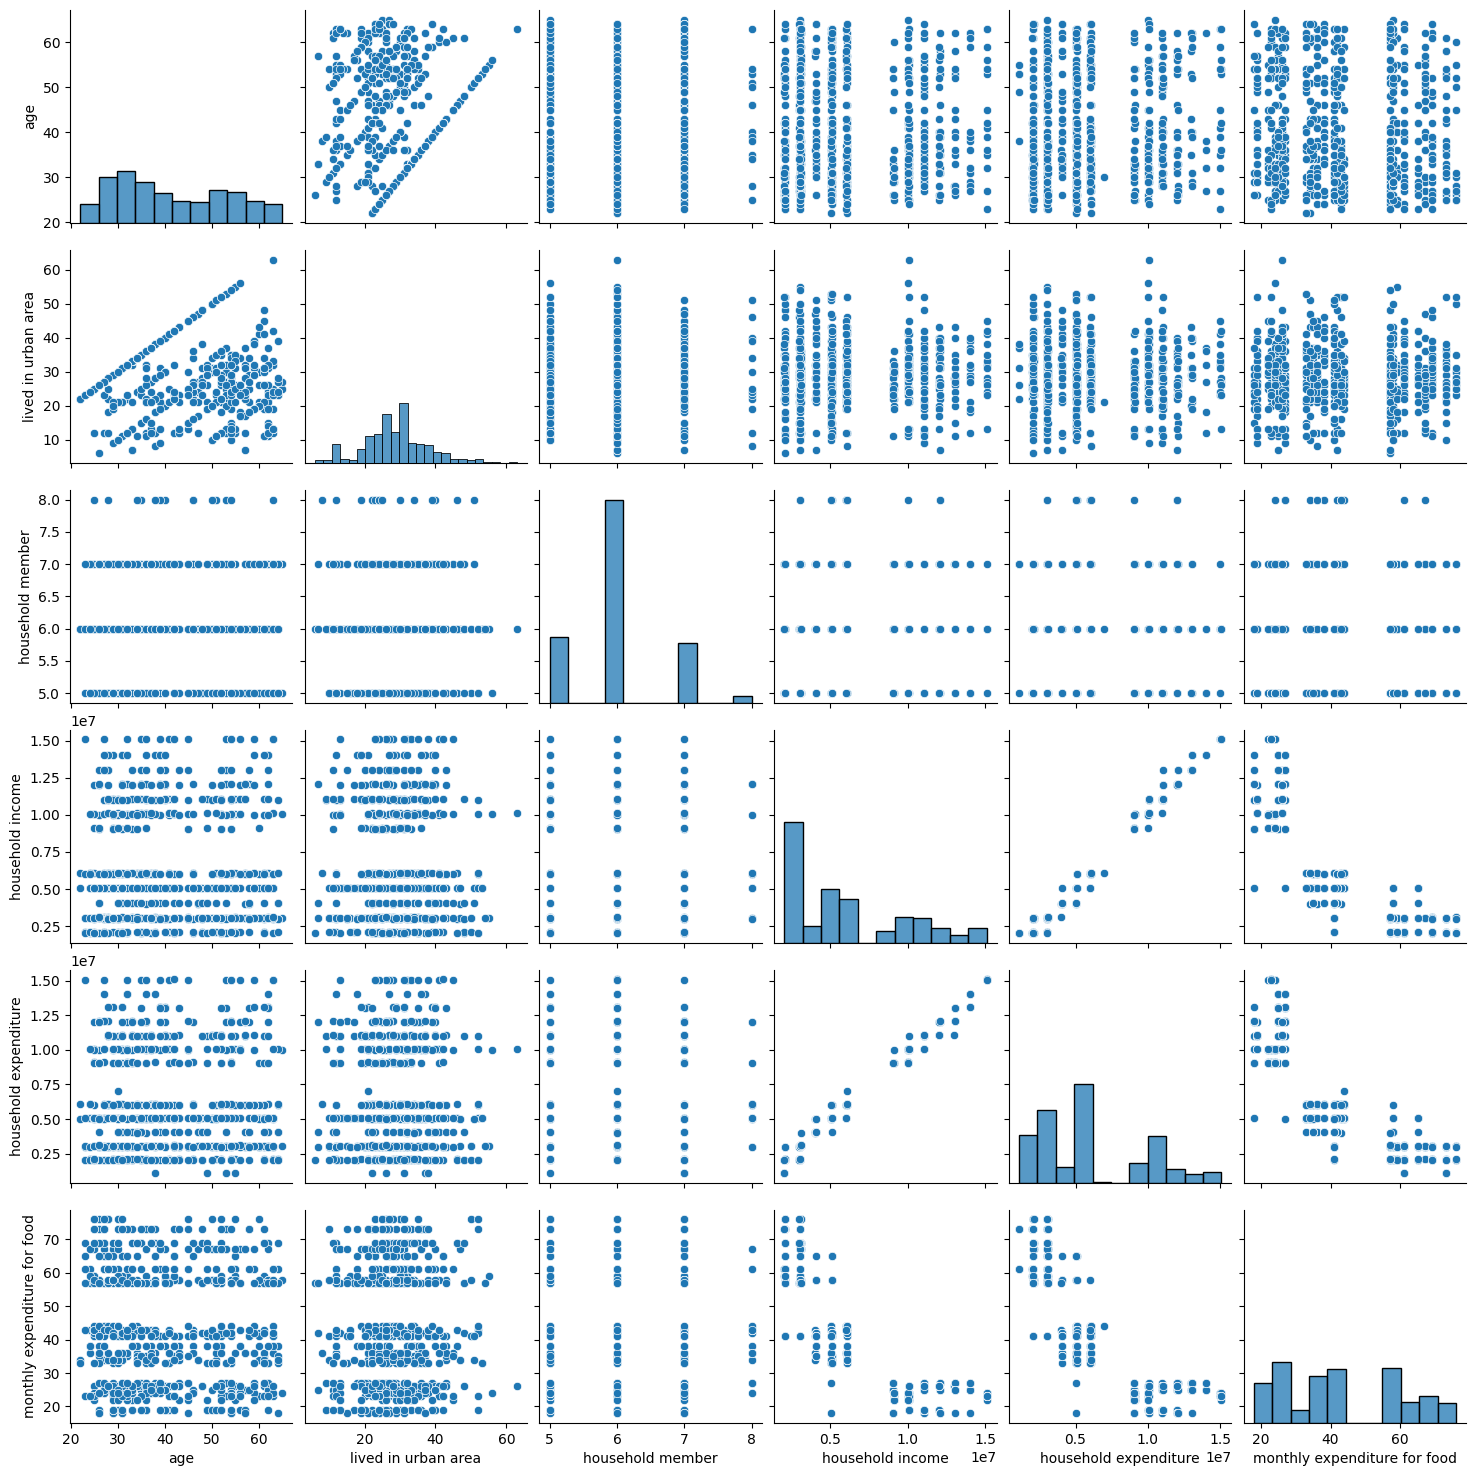

In [ ]:
sns.pairplot(df_pangan2)

In [ ]:
df_pangan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   city                                                             710 non-null    object 
 1   province                                                         710 non-null    object 
 2   gender                                                           710 non-null    object 
 3   age                                                              710 non-null    int64  
 4   religion                                                         710 non-null    object 
 5   ethnic                                                           710 non-null    object 
 6   education level                                                  710 non-null    object 
 7   lived in urban area                         

In [ ]:
# Check distribution of numerical features

numerical = df_pangan2.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numerical

['age',
 'lived in urban area',
 'household member',
 'household income',
 'household expenditure',
 'monthly expenditure for food']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'lived in urban area'}>],
       [<Axes: title={'center': 'household member'}>,
        <Axes: title={'center': 'household income'}>],
       [<Axes: title={'center': 'household expenditure'}>,
        <Axes: title={'center': 'monthly expenditure for food'}>]],
      dtype=object)

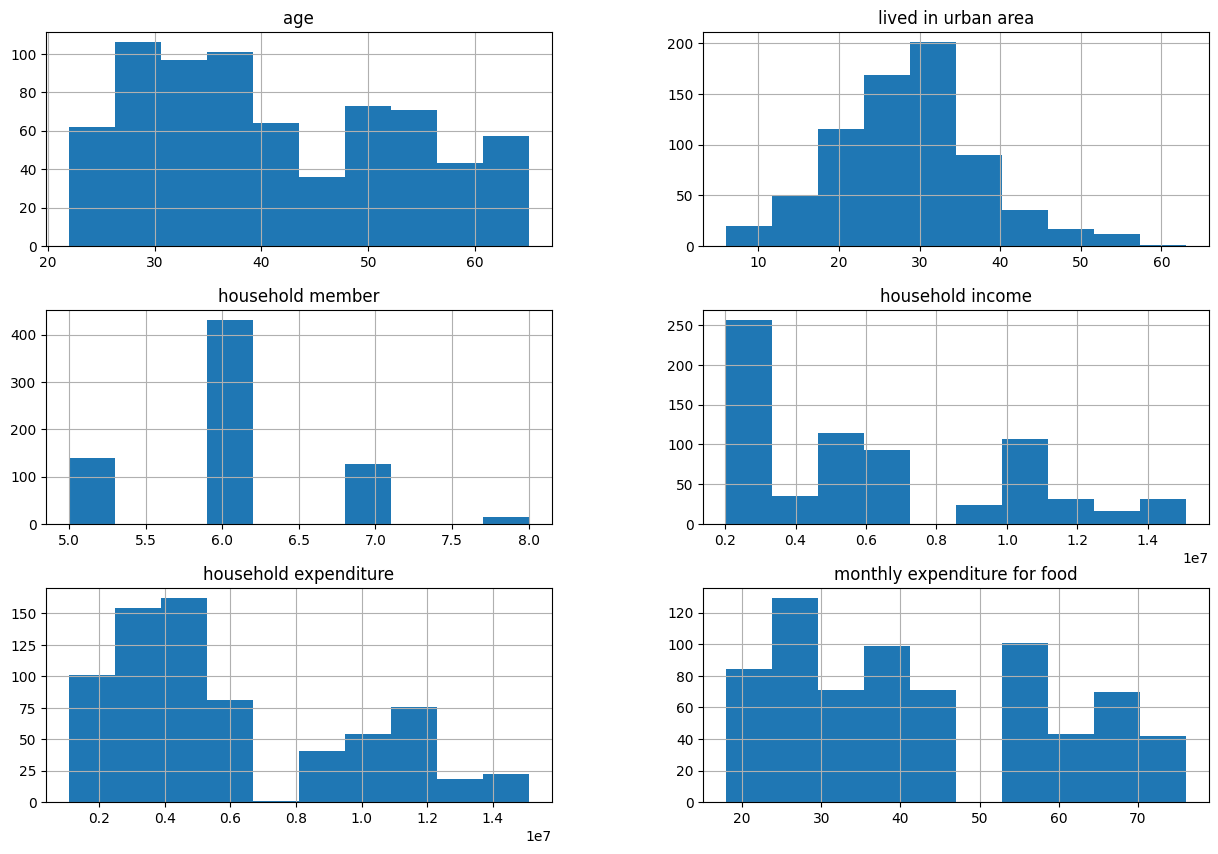

In [ ]:
# Make distribution plot

df_pangan2[numerical].hist()

### 3. Scale liker convert

In [ ]:
df_pangan2['price factor'].unique()

array(['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree',
       'Neither agree nor disagree'], dtype=object)

In [ ]:
df_pangan.iloc[:,-1].unique()

array(['Agree', 'Strongly Agree', 'Neither agree nor disagree',
       'Disagree'], dtype=object)

In [ ]:
#def replace_likert(df):
# new_df = df.copy()
replace_dict = {'Strongly Agree':5,
                'Agree':4,
                'Neither agree nor disagree':3,
                'Disagree':2,
                'Strongly Disagree':1}
for col in df_pangan2.columns[15:]:
  df_pangan2[col] = df_pangan2[col].map(replace_dict)

In [ ]:
df_pangan2.head()

,city,province,gender,age,religion,ethnic,education level,lived in urban area,occupation,social clas,...,religious value in eating places,religious value in consumption pattern,custom value in type of food,custom value in eating places,custom value in consumption pattern,practice of food consumption based on religious rules,practice of food consumption based on custom rules,buying food product in the right place based on religious rules,shes variation based on religious rules,practice of consuming traditional food
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,3,4,5,3,3,3,2,3,4,4
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,4,4,5,4,4,2,3,3,3,5
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,4,3,3,2,4,2,3,3,3,3
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,4,3,4,3,4,4,3,2,3,4
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,5,3,3,3,5,5,4,2,4,4


**Cooking Survey Data with Likert Scale**
* sum all likert and then calculate mean, or median as new combination variable
* calculate mean, stdv, and divide the score based on defined range ( low value and high value)